In [15]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

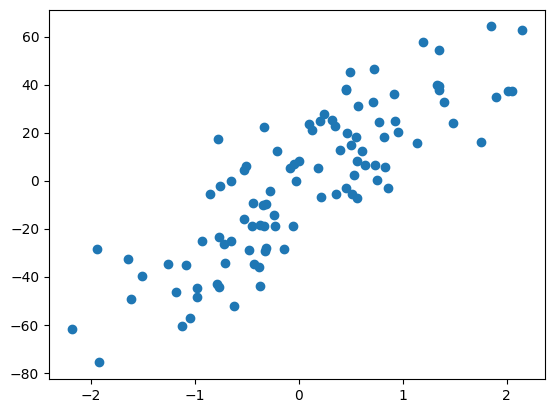

In [16]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)
plt.scatter(X,y)

In [17]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [18]:
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.126913003523573


In [19]:
rr1 =  Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


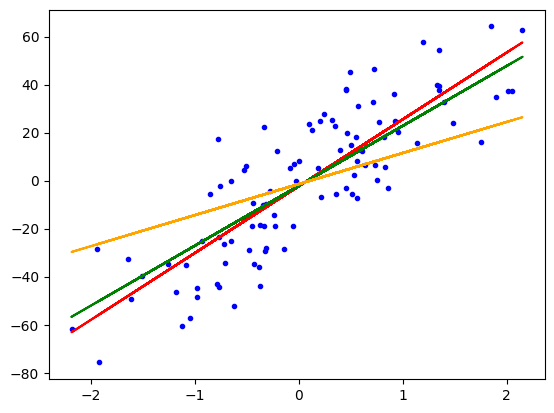

In [20]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red', label='aplha=0')
plt.plot(X,rr.predict(X),color='green', label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange', label='alpha=100')

In [23]:
def linear_regression(X,y,alpha=1):
    X_mean = X.mean()
    Y_mean = y.mean()
    
    num, den = 0, 0
    
    for i in range(X.shape[0]):
        num = num + (X[i] - X_mean) * (y[i] - Y_mean)
        den = den + (X[i] - X_mean) ** 2
        
    m = num / (den + alpha)
    b = Y_mean - m * X_mean
    
    return m, b

In [24]:
linear_regression(X,y, 19)

(array([22.83273667]), array([-2.00297894]))

In [29]:
class CustomRidge:
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
        
    def fit(self, X_train, y_train):
        num = 0
        den = 0
        X_mean = X_train.mean()
        y_mean = y_train.mean()
        
        for i in range(X_train.shape[0]):
            num += (X_train[i] - X_mean) * (y_train[i] - y_mean)
            den += (X_train[i] - X_mean) ** 2
            
        self.m = num / (den + self.alpha)
        self.b = y_mean - self.m * X_mean
        
        print(self.m, self.b)
    
    def predict(self, X_test):
        return self.m * X_test + self.b

In [30]:
reg = CustomRidge(100)
reg.fit(X,y)

[12.93442104] [-1.42484415]
